## **Know Your Customers Better: A Journey Through RFM Analysis**

Picture yourself running a cozy bookstore in a busy city. Every day, people come in and out, buying books, browsing, or just enjoying the atmosphere. But amid all the hustle and bustle, you're facing a challenge: understanding your customers.

You see, each customer leaves a trail of info behind – like when they last came (Recency), how often they visit (Frequency), and how much they spend (Monetary). But sorting through all this data is like finding a needle in a haystack. You struggle to figure out who your most loyal customers are, and who's just passing through.

That's where RFM analysis comes in. It helps you sift through the data and find the customers who really matter – the ones who keep coming back and spending lots of money. Once you know who they are, you can give them special treatment, like personalized recommendations or exclusive deals, to keep them coming back for more.

So, join us on this journey as we use RFM analysis to uncover the secrets hidden in your customer data and find the key to your bookstore's success – your best customers.

### Task 1: Loading Customer Data

Let's start by loading the customer data. It's important to take a look at this data to understand what we're working with. Let's check it out.

In [7]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset(customer_data.csv) ----
data = pd.read_csv("RMF/customer_data.csv")
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


### Task 2: Recency Calculation

After loading the customer data successfully, it's time to figure out how recent each customer made a purchase. This tells us how recently each customer interacted with our business. Let's crunch the numbers and see!

# Task

- Convert the 'PurchaseDate' column in the DataFrame to datetime format using pd.to_datetime().
- Calculate the recency of each purchase by subtracting the purchase date from the maximum purchase date and storing the result in a new column named 'Recency' measured in days.

In [8]:
#--- Import datetime ---
import datetime

In [9]:
data["PurchaseDate"] = pd.to_datetime(data["PurchaseDate"])
# calculate maximum_purchase_data 
maximum_purchase_data = max(data["PurchaseDate"])

for i in data["PurchaseDate"]:
    data["Recency"] = (maximum_purchase_data - data["PurchaseDate"]).dt.days
# #--- Inspect data ---
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60
1,2188,2023-04-11,463.70,Product A,176819,London,60
2,4608,2023-04-11,80.28,Product A,340062,New York,60
3,2559,2023-04-11,221.29,Product A,239145,London,60
4,9482,2023-04-11,739.56,Product A,194545,Paris,60
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0
996,6669,2023-06-10,941.50,Product C,987025,New York,0
997,8836,2023-06-10,545.36,Product C,512842,London,0
998,1440,2023-06-10,729.94,Product B,559753,Paris,0


### Task 3: Calculating Frequency

Now that we know how recent each customer made a purchase, let's find out how often they buy from us. This will help us understand how frequently each customer interacts with our business. Let's dive in and find out!

# Task

- Group the data by 'CustomerID' and count the number of unique 'OrderID' for each customer and reset the index of the resulting DataFrame and rename the column containing the counts to 'Frequency'.
- Merge the frequency data back into the original DataFrame based on 'CustomerID', adding the 'Frequency' column and update the DataFrame with the merged data

In [10]:
result = data.groupby("CustomerID")["OrderID"].nunique().reset_index()
result = result.rename(columns={'OrderID': 'Frequency'})
data = data.merge(result, on="CustomerID", how="left")


#--- Inspect data ---

data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1
1,2188,2023-04-11,463.70,Product A,176819,London,60,1
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1
997,8836,2023-06-10,545.36,Product C,512842,London,0,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1


### Task 4: Calculating Monetary Value

Following our success in understanding recency and frequency, let's now determine the monetary value of each customer. This will give us insights into how much each customer spends with our business. Let's proceed and uncover this valuable information!

# Task

- Group the data by 'CustomerID' and calculate the sum of 'TransactionAmount' for each customer.
- Reset the index of the resulting DataFrame and rename the column containing the sums to 'MonetaryValue'.
- Merge the monetary value data back into the original DataFrame based on 'CustomerID', adding the 'MonetaryValue' column and update the DataFrame with the merged data.

In [11]:
result_new = data.groupby("CustomerID")["TransactionAmount"].sum().reset_index()
result_new = result_new.rename(columns={'TransactionAmount': 'MonetaryValue'})
data = data.merge(result_new, on="CustomerID", how="left")


#--- Inspect data ---

data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94


### Task 5: Scoring RFM Values

Great progress so far, let's define scoring criteria for each RFM value. We'll create bins for recency, frequency, and monetary value, and assign scores based on these bins. For recency, a higher score indicates a more recent purchase, while for frequency and monetary value, higher scores represent higher engagement and spending. Let's calculate the RFM scores and add them to our dataset. This will help us segment customers based on their behavior. Let's continue and score our RFM values!

# Task

- Define the scoring criteria for each RFM value:
- For Recency: Break down into bins [-1, 30, 60, 90, 180, ∞] with labels [5, 4, 3, 2, 1].
- For Frequency: Break down into bins [0, 1, 2, 3, 4, ∞] with labels [1, 2, 3, 4, 5].
- For Monetary Value: Break down into bins [0, 100, 200, 300, 400, ∞] with labels [1, 2, 3, 4, 5].

In [12]:
recency_bins = [-1, 30, 60, 90, 180, float("inf")]
recency_labels =  [5, 4, 3, 2, 1]
data["RecencyScore"] = pd.cut(data["Recency"], bins= recency_bins, labels =recency_labels, right=True)

frequence_bins = [0, 1, 2, 3, 4, float("inf")]
frequence_labels = [1, 2, 3, 4, 5]
data["FrequencyScore"] = pd.cut(data["Frequency"], bins= frequence_bins, labels =frequence_labels, right=True)

moneytary_bins = [0, 100, 200, 300, 400, float("inf")]
moneytary_labels = [1, 2, 3, 4, 5]
data["MonetaryScore"] = pd.cut(data["MonetaryValue"], bins= moneytary_bins, labels =moneytary_labels, right=True)

#--- Inspect data ---
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62,5,1,5
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50,5,1,5
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36,5,1,5
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94,5,1,5


### Task 6: Calculating RFM Score

Great, We're almost there! After assigning scores to recency, frequency, and monetary values, let's convert these scores into integers. Then, we'll calculate the overall RFM score by adding up the individual scores. This final score gives us a comprehensive view of each customer's engagement with our business. Let's complete this last step and finalize our RFM analysis!

# Task

- Convert the 'RecencyScore', 'FrequencyScore', and 'MonetaryScore' columns to integer type.
- Create a new column named 'RFM_Score' by adding the values of 'RecencyScore', 'FrequencyScore', and 'MonetaryScore' together.

In [14]:
data["RecencyScore"] = data["RecencyScore"].astype(int)
data["FrequencyScore"] = data["FrequencyScore"].astype(int)
data["MonetaryScore"] = data["MonetaryScore"].astype(int)
data["RFM_Score"] = data["RecencyScore"] + data["FrequencyScore"] + data["MonetaryScore"]

#--- Inspect data ---
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62,5,1,5,11
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50,5,1,5,11
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36,5,1,5,11
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94,5,1,5,11


### Task 7: Creating RFM Segments

Congratulations! Now, let's segment our customers based on their RFM scores. We'll divide them into three groups: low-value, mid-value, and high-value. By grouping customers this way, we can better understand their importance to our business and tailor our strategies accordingly. Let's create these segments and see how our customers are distributed across them!

# Task

- Define segment labels as 'Low-Value', 'Mid-Value', and 'High-Value'.
- Create a new column named 'Value Segment' by dividing the RFM scores into three equal-sized segments using quantiles and assigning the corresponding segment labels.

In [16]:
# #calculating the Quantiles(33rd and 66th Percentiles)
# p33 = data["RFM_Score"].quantile(0.33)
# p66 = data["RFM_Score"].quantile(0.66)

# def assign_value_segment(row):
#         if row["RFM_Score"] <= p33:
#             return "Low-Value"
#         elif row["RFM_Score"] <= p66:
#             return "Mid-Value"
#         elif row["RFM_Score"] > p66:
#             return "High-Value"
#         else:
#             return "Mid-Value"
        
# data["Value Segment"] = data.apply(assign_value_segment, axis=1)
# data["Value Segment"] = data["Value Segment"].astype("category")
# Create RFM segments based on the RFM score


segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)
#--- Inspect data ---
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62,5,1,5,11,Mid-Value
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50,5,1,5,11,Mid-Value
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36,5,1,5,11,Mid-Value
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94,5,1,5,11,Mid-Value


### Task 8: Visualizing RFM Segments

Well done on completing all the previous tasks! Now, let's visualize the distribution of customers across the RFM segments. We'll create a count plot to show how many customers fall into each segment: low-value, mid-value, and high-value. This visualization helps us understand the composition of our customer base and identify areas for improvement. Let's plot it and see the results!

# Task

- Create a count plot for RFM segments using Seaborn and Matplotlib.
- Use the data from the column 'Value Segment' for the x-axis in the count plot.
- Assign the count plot object to the variable count_plt.


In [18]:
# ---import seaborn,matplotlib ---
import seaborn as sn
import matplotlib.pyplot as plt

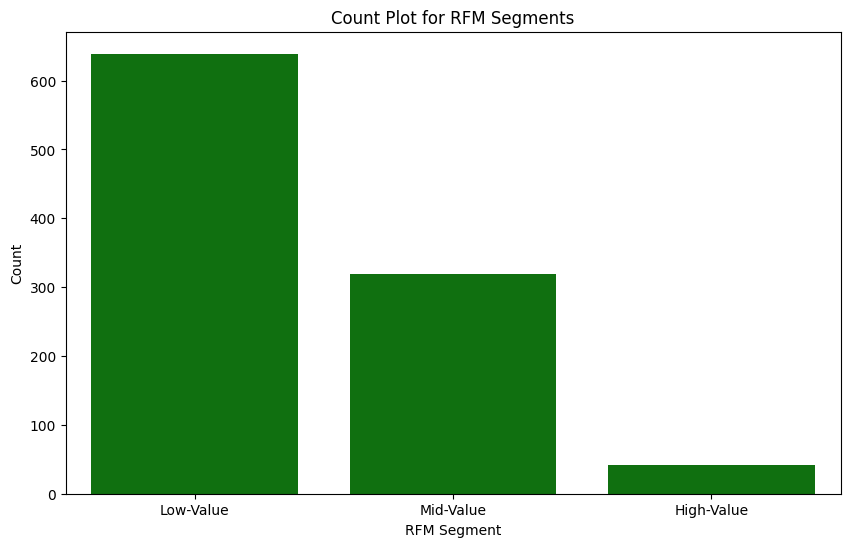

In [31]:
plt.figure(figsize=(10, 6))
count_plt = sn.countplot(x = data["Value Segment"], color="Green")

plt.title('Count Plot for RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
#--- Inspect data ---
plt.show()